# CO2 Emission Analysis
- Our dataset has four columns namely; entity, code, Year, and Annual CO2 emmision.
- Every row has an entity which is the name of the country, accompanied by the countries code, yearly emiision of CO2 in that country.

#### Objectives of this Project 
- We want to check the coutry which emmitted more CO2 during the year 2023 in Africa.
- which continent emmits the highes CO2 and why? How can they manage this issue.
- 

  

In [1]:
#Import our librariries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt # or use import matplotlib.pyplot as plt 
import seaborn as sn


In [2]:
#lets read our csv file using pandas 
df = pd.read_csv('annual-co2-emissions-per-country.csv')
df.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


#### Exploratory Data Analysis
We will explore our dataset and perform data cleaning.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29137 entries, 0 to 29136
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Entity                29137 non-null  object 
 1   Code                  23497 non-null  object 
 2   Year                  29137 non-null  int64  
 3   Annual CO₂ emissions  29137 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 910.7+ KB


In [4]:
df.isnull().sum()

Entity                     0
Code                    5640
Year                       0
Annual CO₂ emissions       0
dtype: int64

In [5]:
#checking unique countries in the entity column
df['Entity'].unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Albania', 'Algeria',
       'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia (GCP)', 'Asia (excl. China and India)', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Domini

In [6]:
df['Code'].unique()

array(['AFG', nan, 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATA', 'ATG', 'ARG',
       'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH',
       'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR',
       'CAN', 'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR', 'COL', 'COM',
       'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE',
       'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'TLS', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA',
       'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG',
       'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX',
       'FS

In [7]:
#Let us display entities without codes by Filtering for entities with no codes (NaN or empty)
entities_without_codes = df[df['Code'].isnull() | (df['Code'] == '')]

# Print the result
print(entities_without_codes['Entity'].unique())

['Africa' 'Africa (GCP)' 'Asia' 'Asia (GCP)'
 'Asia (excl. China and India)' 'Central America (GCP)' 'Europe'
 'Europe (GCP)' 'Europe (excl. EU-27)' 'Europe (excl. EU-28)'
 'European Union (27)' 'European Union (28)' 'High-income countries'
 'International aviation' 'International shipping'
 'Kuwaiti Oil Fires (GCP)' 'Low-income countries'
 'Lower-middle-income countries' 'Middle East (GCP)' 'Non-OECD (GCP)'
 'North America' 'North America (GCP)' 'North America (excl. USA)'
 'OECD (GCP)' 'Oceania' 'Oceania (GCP)' 'Ryukyu Islands (GCP)'
 'South America' 'South America (GCP)' 'Upper-middle-income countries']


#### Observations
- The code column has 5460 null values, dropping these values will cost us to lost important info about some countries annual CO2 emmision for a particular year.
- We will assign codes to the entities without codes. This will help preserve infomation.
- We should note that in some cases where this information does not affect our analysis we can go ahead and drop the columns with null values.

In [8]:
# Assigning codes to entities without codes 

# Define the mapping of continent entities to their codes and also assign codes(abbreviations) to countries without codes.
entity_code_mapping = {
    'Africa': 'AF',
    'Africa (GCP)': 'AFRG',
    'Asia': 'AS',
    'Asia (GCP)': 'ASG',
    'Asia (excl. China and India)': 'ASE',
    'Central America (GCP)': 'CAC',
    'European Union (27)': 'EU27',
    'European Union (28)': 'EU28',
    'Europe': 'EU',
    'Europe (GCP)': 'EUG',
    'Europe (excl. EU-27)': 'EUE',
    'Europe (excl. EU-28)': 'EUX',
    'High-income countries': 'HIC',
    'International aviation': 'IVA',
    'International shipping': 'ISH',
    'Kuwaiti Oil Fires (GCP)': 'KOF',
    'Low-income countries': 'LIC',
    'Lower-middle-income countries': 'LMC',
    'Middle East (GCP)': 'MEC',
    'Non-OECD (GCP)': 'NOC',
    'North America': 'NA',
    'North America (GCP)': 'NAC',
    'North America (excl. USA)': 'NAE',
    'Oceania': 'OC',
    'Oceania (GCP)': 'OCG',
    'OECD (GCP)': 'OEG',
    'Ryukyu Islands (GCP)': 'RYU',
    'South America': 'SA',
    'South America (GCP)': 'SAC',
    'Upper-middle-income countries': 'UMC'
}

# Update the Code column for entities in the mapping
for entity, code in entity_code_mapping.items():
    df.loc[df['Entity'] == entity, 'Code'] = code



In [9]:
#we run the code above again to see if we have entities without codes
# Filter for entities with no codes (NaN or empty)
entities_without_codes = df[df['Code'].isnull() | (df['Code'] == '')]

# Print the result
print(entities_without_codes['Entity'].unique())

[]


In [10]:
df.isnull().sum()

Entity                  0
Code                    0
Year                    0
Annual CO₂ emissions    0
dtype: int64

In [11]:
df.nunique()

Entity                    247
Code                      247
Year                      274
Annual CO₂ emissions    21854
dtype: int64

In [12]:
#displays unique entities and their unique codes
for entity, code in zip(df['Entity'].unique(), df['Code'].unique()):
    print(entity, code)

Afghanistan AFG
Africa AF
Africa (GCP) AFRG
Albania ALB
Algeria DZA
Andorra AND
Angola AGO
Anguilla AIA
Antarctica ATA
Antigua and Barbuda ATG
Argentina ARG
Armenia ARM
Aruba ABW
Asia AS
Asia (GCP) ASG
Asia (excl. China and India) ASE
Australia AUS
Austria AUT
Azerbaijan AZE
Bahamas BHS
Bahrain BHR
Bangladesh BGD
Barbados BRB
Belarus BLR
Belgium BEL
Belize BLZ
Benin BEN
Bermuda BMU
Bhutan BTN
Bolivia BOL
Bonaire Sint Eustatius and Saba BES
Bosnia and Herzegovina BIH
Botswana BWA
Brazil BRA
British Virgin Islands VGB
Brunei BRN
Bulgaria BGR
Burkina Faso BFA
Burundi BDI
Cambodia KHM
Cameroon CMR
Canada CAN
Cape Verde CPV
Central African Republic CAF
Central America (GCP) CAC
Chad TCD
Chile CHL
China CHN
Christmas Island CXR
Colombia COL
Comoros COM
Congo COG
Cook Islands COK
Costa Rica CRI
Cote d'Ivoire CIV
Croatia HRV
Cuba CUB
Curacao CUW
Cyprus CYP
Czechia CZE
Democratic Republic of Congo COD
Denmark DNK
Djibouti DJI
Dominica DMA
Dominican Republic DOM
East Timor TLS
Ecuador ECU
Egypt 

In [13]:
#Rename the emmision column by adding tonnes to show that values were measured in tonnes. The readme file for this project indicated that the value is given in tonnes
df.rename( columns = {'Annual CO₂ emissions':'Annual CO₂ emissions(tonnes)'}, inplace =True)
df.head()

,Entity,Code,Year,Annual CO₂ emissions(tonnes)
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [14]:
#provides s statistics of values in this column
df['Annual CO₂ emissions(tonnes)'].describe()

count    2.913700e+04
mean     4.156982e+08
std      1.945853e+09
min      0.000000e+00
25%      3.737280e+05
50%      4.990392e+06
75%      5.327268e+07
max      3.779157e+10
Name: Annual CO₂ emissions(tonnes), dtype: float64

### Entity Analysis
- Each value of the entity column will be classified under the following categories ;Continents, territories,income classification, global and special casses.
- For example if a country belongs to Asia or Africa, it will show there Asia. Entities that are continents, will show continents.
- Classifying these entities will help us in visualizing our dataset and bringing out insights per continents etc.
  
#### Some Definitions
- Country: A country is a sovereign nation with its own government, laws, and usually recognized borders.
- Territories: Territories are areas under the control of sovereign countries but not fully independent. It belongs to another country but may have some local government.
- Continent: A continent is a large landmass, like Africa or Asia. 
- Regional Groupings: This term refers to collections of countries based on various criteria (like geography or politics). It should contain specific group.
- Income Classifications: This categorizes economies based on income levels set by the World Bank. 
- Global: This term represents total emissions from the entire world. 
- Special Events: This category likely includes emissions from unusual, one-time events.

In [15]:
#Classifying the different entities into the different categories

classification = {
    "Continent":[ "Africa","Asia","Europe", "North America", "South America","Oceania",],#"Antarctica"
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
        "Cape Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
        "Congo", "Cote d'Ivoire", "Democratic Republic of Congo", "Djibouti",
        "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon",
        "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia",
        "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
        "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
        "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan",
        "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
        "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia",
        "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan",
        "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal",
        "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Russia",
        "Saudi Arabia", "Singapore", "South Korea", "Sri Lanka", "Syria", "Taiwan",
        "Tajikistan", "Thailand", "Timor-Leste","East Timor", "Turkey", "Turkmenistan",
        "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Czechia", "Denmark", "Estonia", "Finland", "France",
        "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia",
        "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro",
        "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania",
        "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland",
        "Ukraine", "United Kingdom", "Vatican City"
    ],
    "North America": [
        "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica",
        "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama",
        "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines",
        "Trinidad and Tobago", "United States"
    ],
    "South America": [
        "Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana",
        "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia (country)",
        "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands",
        "Tonga", "Tuvalu", "Vanuatu"
    ],
    "Antarctica": [
        "Antarctica"
    ],
    "Regional Groupings": [
        "Africa (GCP)", "Asia (GCP)", "Asia (excl. China and India)", "Central America (GCP)",
        "Europe (GCP)", "Europe (excl. EU-27)", "Europe (excl. EU-28)", "European Union (27)",
        "European Union (28)", "Middle East (GCP)", "North America (GCP)", 
        "North America (excl. USA)", "Oceania (GCP)", "South America (GCP)", "OECD (GCP)",
        "Non-OECD (GCP)"
    ],
    "Territories": [
        "Anguilla", "Aruba", "Bermuda", "British Virgin Islands", "Bonaire Sint Eustatius and Saba","Christmas Island",
        "Cook Islands", "Curacao", "Faroe Islands", "French Polynesia", "Greenland",
        "Hong Kong", "Macao", "Montserrat", "New Caledonia", "Niue",'Saint Helena',
        "Saint Pierre and Miquelon", "Sint Maarten (Dutch part)", "Turks and Caicos Islands",
        "Wallis and Futuna"
    ],
    "Income Classifications": [
        "High-income countries", "Low-income countries", "Lower-middle-income countries",
        "Upper-middle-income countries"
    ],
    "Global": [
        "World", "International aviation", "International shipping"
    ],
    "Special Events": [
        "Kuwaiti Oil Fires (GCP)", "Ryukyu Islands (GCP)"
    ]
}

In [16]:
#Python code to loop through and classify the entity under the new column called Regions
def classify_entity(entity):
    for region, countries in classification.items():
        if entity in countries:
            return region
    return 'Unknown'


# Apply the classification to the DataFrame
df['Region'] = df['Entity'].apply(classify_entity)

# Save the updated DataFrame to a CSV file
df.to_csv('classified_countries.csv', index=False)



In [17]:
df_classified = pd.read_csv('classified_countries.csv')
df_classified.head(100)

,Entity,Code,Year,Annual CO₂ emissions(tonnes),Region
0,Afghanistan,AFG,1949,14656.0,Asia
1,Afghanistan,AFG,1950,84272.0,Asia
2,Afghanistan,AFG,1951,91600.0,Asia
3,Afghanistan,AFG,1952,91600.0,Asia
4,Afghanistan,AFG,1953,106256.0,Asia
...,...,...,...,...,...
95,Africa,AF,1904,8910848.0,Continent
96,Africa,AF,1905,10262864.0,Continent
97,Africa,AF,1906,11717472.0,Continent
98,Africa,AF,1907,12930256.0,Continent


## Data Visualization

### 1. Global CO₂ Emissions Over Time
- Shows the total worldwide emissions trend from the earliest to the latest year.
- Reveals long-term trends, acceleration, and potential plateaus in global emissions.

   Year  Annual CO₂ emissions(tonnes)
0  1750                     9305937.0
1  1751                     9407229.0
2  1752                     9505168.0
3  1753                     9610490.0
4  1754                     9733580.0


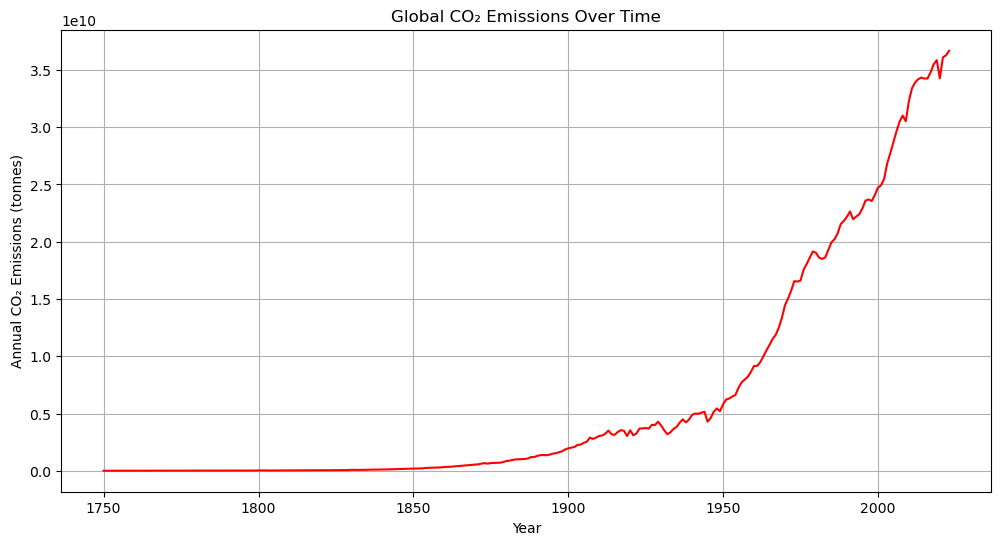

In [18]:
# Filter only total continental/global entries (optional)
global_df = df_classified[df_classified['Region'] == 'Continent'].groupby('Year')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(global_df.head())
plt.figure(figsize=(12, 6))
plt.plot(global_df['Year'], global_df['Annual CO₂ emissions(tonnes)'], color='red')
plt.title('Global CO₂ Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions (tonnes)')
plt.grid(True)
plt.show()

### 2. CO2 emmision for Cameroon 
- we will plot a line chart of year against annual co2 emmission.
- reveals annual trends from the year 1750 t0 2023


    Year  Annual CO₂ emissions(tonnes)
0   1950                      139232.0
1   1951                      183200.0
2   1952                      282128.0
3   1953                      201520.0
4   1954                      230832.0
..   ...                           ...
69  2019                     9605969.0
70  2020                     9715630.0
71  2021                     9605282.0
72  2022                    10045834.0
73  2023                     9941406.0

[74 rows x 2 columns]


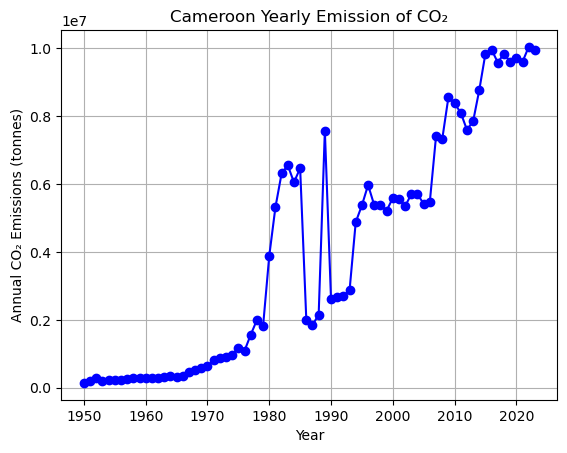

In [19]:
# Filter for Cameroon and group by Year
y = df_classified[df_classified['Entity'] == 'Cameroon'].groupby('Year')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
# Extract x and y for plotting
x = y['Year']  # Years for the x-axis
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the y-axis

# Create the plot
plt.plot(x, emissions, marker='o', color='blue')  # Adding markers for clarity
plt.xlabel('Year')
plt.ylabel('Annual CO₂ Emissions (tonnes)')
plt.title('Cameroon Yearly Emission of CO₂')
plt.grid(True)
plt.show()

### 3. CO2 emmision for all countries in Africa


                          Entity  Annual CO₂ emissions(tonnes)
0                        Algeria                  5.263690e+09
1                         Angola                  7.153404e+08
2                          Benin                  1.216886e+08
3                       Botswana                  1.734650e+08
4                   Burkina Faso                  8.871584e+07
5                        Burundi                  1.541374e+07
6                       Cameroon                  2.999828e+08
7                     Cape Verde                  1.618478e+07
8       Central African Republic                  1.211561e+07
9                           Chad                  4.892444e+07
10                       Comoros                  6.798687e+06
11                         Congo                  1.810487e+08
12                 Cote d'Ivoire                  3.835648e+08
13  Democratic Republic of Congo                  2.302409e+08
14                      Djibouti                  2.042

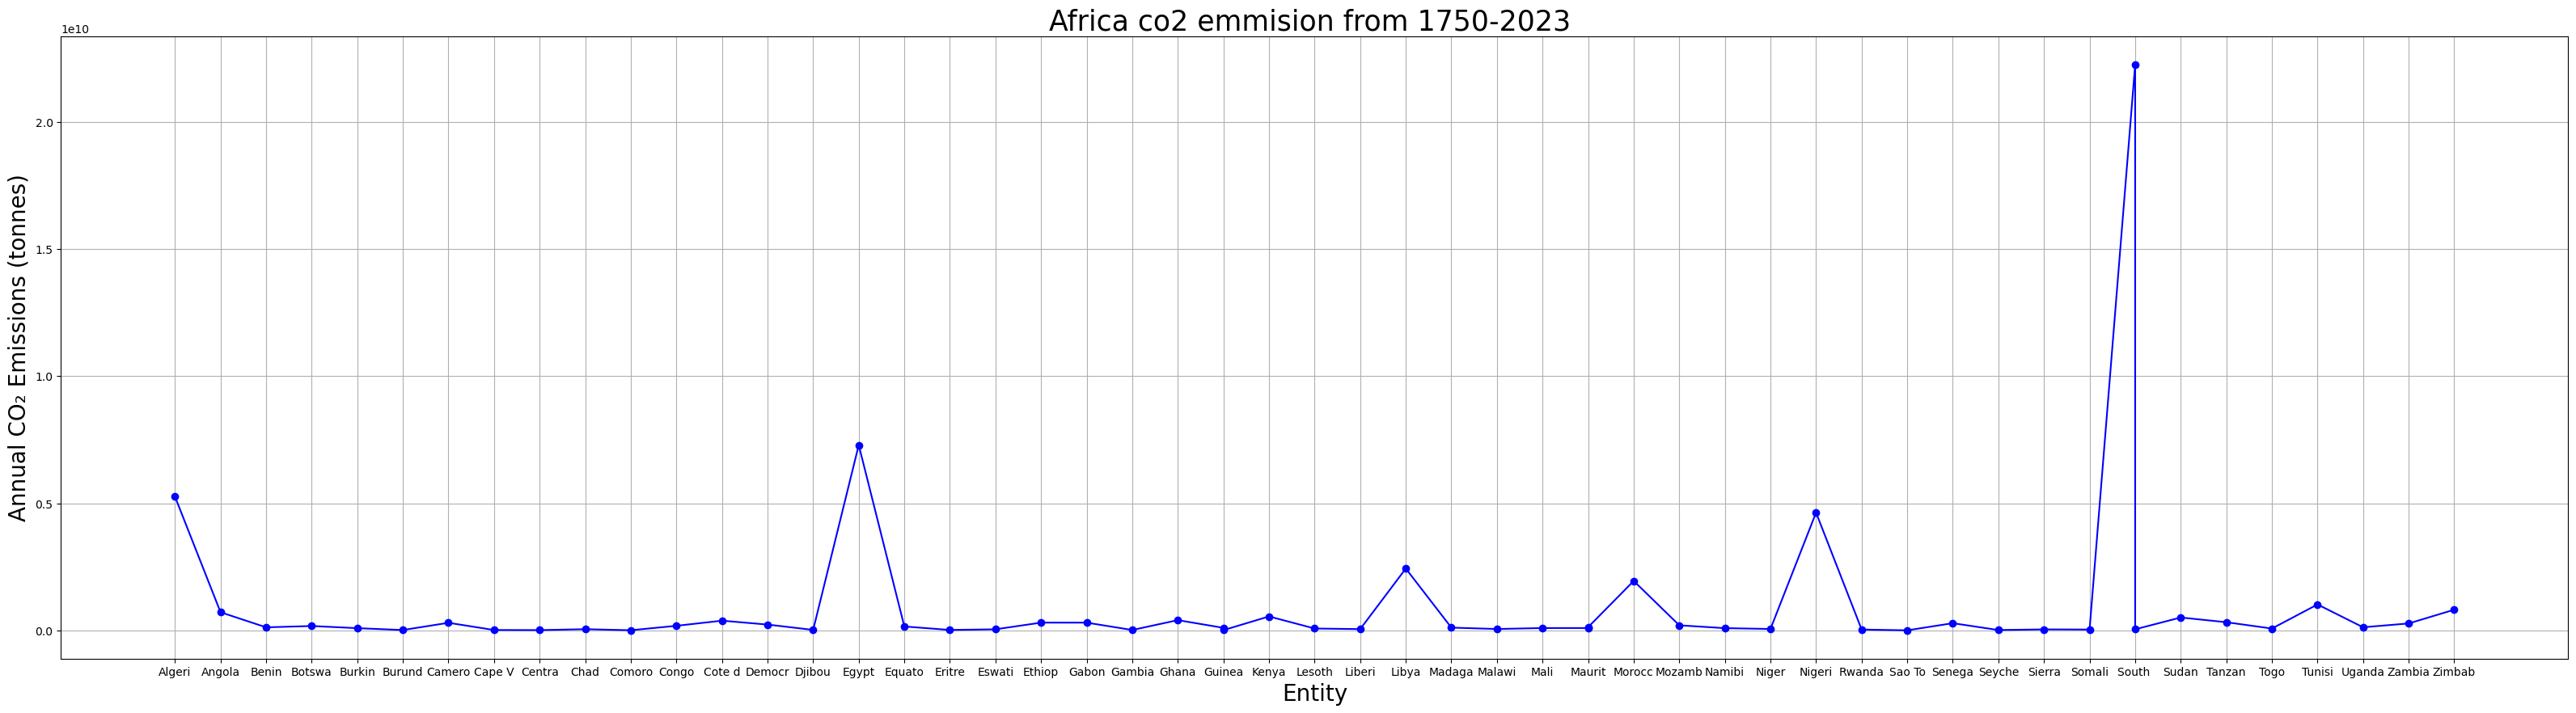

In [20]:

y = df_classified[df_classified['Region'] == 'Africa'].groupby('Entity')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
# Extract x and y for plotting
#x = y['Code']  
x = y['Entity'].str.slice(0, 6)  
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the y-axis
#create figure
plt.figure(figsize=(40, 10))

# Create the plot
plt.plot(x, emissions, marker='o', color='blue')  # Adding markers for clarity
plt.xlabel('Entity',fontsize=20)
plt.ylabel('Annual CO₂ Emissions (tonnes)',fontsize=20)
plt.title('Africa co2 emmision from 1750-2023 ',fontsize=25)

plt.grid(True)
plt.show()

#### We will Redo the analysis above but our focus will be on the year 2023
- Our analysis shows that South Africa emitted the highest amount of CO2 followed by Egpyth and then algeria.
- We can do thesame for other continents by just changing the region value to the continents we want to analyse.


                          Entity  Annual CO₂ emissions(tonnes)
0                        Algeria                   178132770.0
1                         Angola                    20780540.0
2                          Benin                     5592317.0
3                       Botswana                     6713559.0
4                   Burkina Faso                     6186583.0
5                        Burundi                      709700.0
6                       Cameroon                     9941406.0
7                     Cape Verde                      534969.0
8       Central African Republic                      281213.0
9                           Chad                     3079389.0
10                       Comoros                      448731.0
11                         Congo                     7674340.0
12                 Cote d'Ivoire                    13195601.0
13  Democratic Republic of Congo                     4615953.0
14                      Djibouti                      4

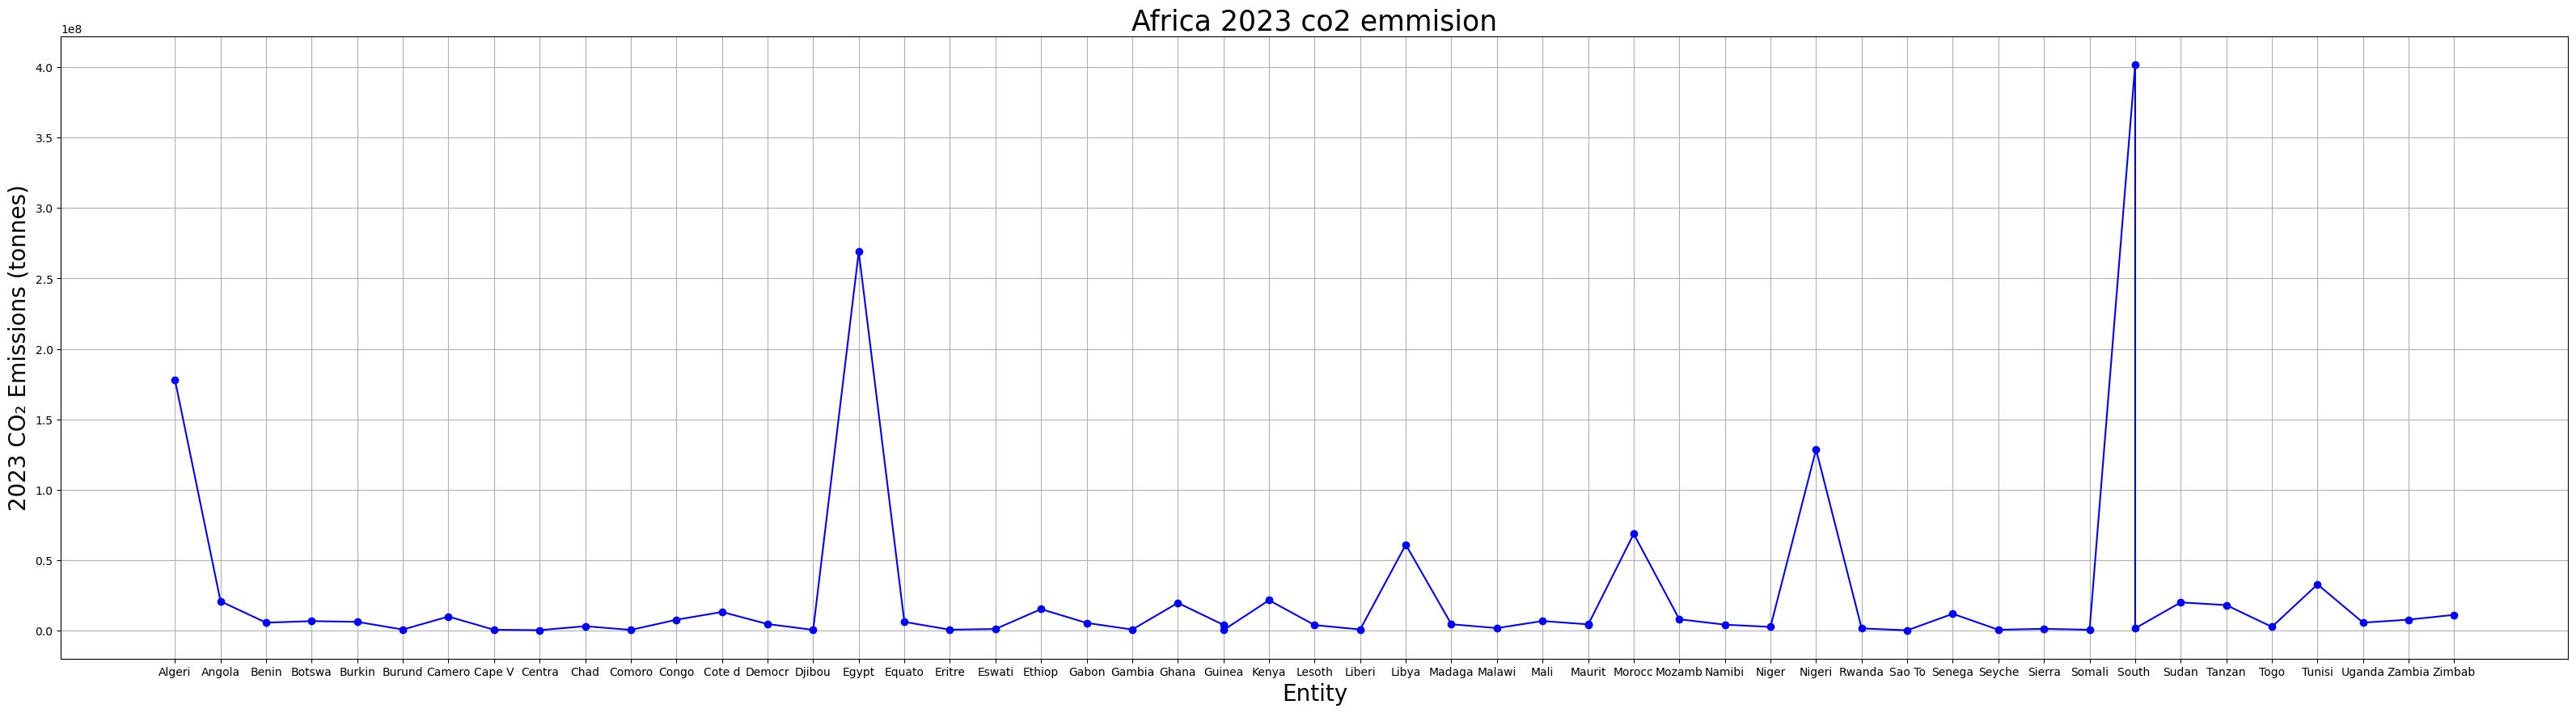

In [21]:
# Filter for Cameroon and group by Year
y = df_classified[(df_classified['Year'] == 2023) & (df_classified['Region'] == 'Africa')].groupby('Entity')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
# Extract x and y for plotting
x = y['Entity'].str.slice(0, 6)   
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the y-axis
#create figure
plt.figure(figsize=(40, 10))

# Create the plot
plt.plot(x, emissions, marker='o', color='blue',)  # Adding markers for clarity
plt.xlabel('Entity', fontsize=20)
plt.ylabel('2023 CO₂ Emissions (tonnes)', fontsize=20)
plt.title('Africa 2023 co2 emmision',  fontsize=25)

plt.grid(True)
plt.show()

### 4. Emmission by continents
- We will see which continents emits the highest Co2 

          Region  Annual CO₂ emissions(tonnes)
0         Africa                  1.418728e+09
1     Antarctica                  0.000000e+00
2           Asia                  2.438839e+10
3         Europe                  3.169325e+09
4  North America                  6.117954e+09
5        Oceania                  4.242077e+08
6  South America                  1.108965e+09


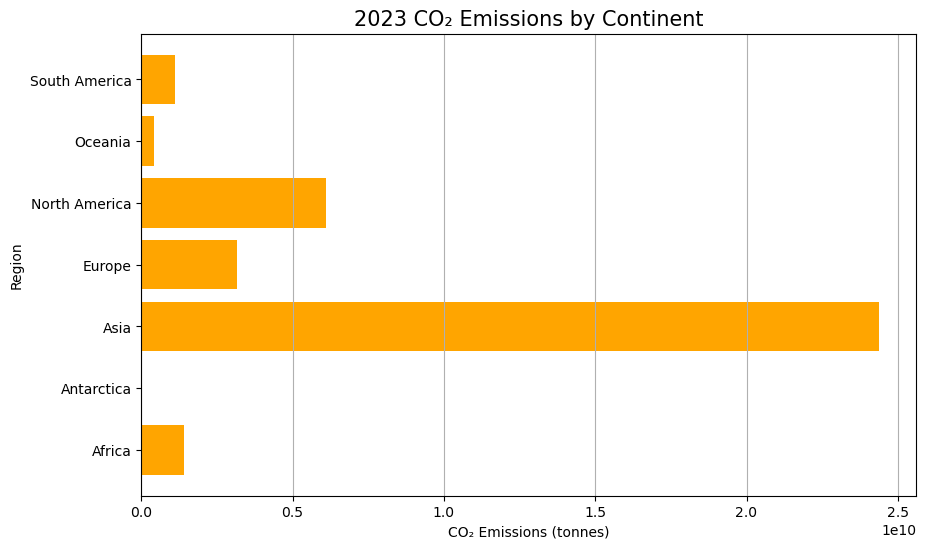

In [22]:
# Filter the continents and group by Region
y = df_classified[(df_classified['Year'] == 2023) & (df_classified['Region'].isin(['Africa', 'Asia',"Europe", "North America", "South America","Oceania","Antarctica"]))].groupby('Region')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
#Extract x and y for plotting
regions = y['Region']  # Regions for the y-axis
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the x-axis

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.barh(regions, emissions, color='orange')  # Horizontal bar chart
plt.xlabel('CO₂ Emissions (tonnes)', fontsize=10)  # x-axis label
plt.ylabel('Region', fontsize=10)  # y-axis label
plt.title('2023 CO₂ Emissions by Continent', fontsize=15)  # Title

plt.grid(axis='x')  # Add grid lines for better readability
plt.show()

### Reducing Bias in our dataset
- for better and accurate visualization, we will filter our data set such that the entities have a common years in which CO2 was emmited.
- We will do this by first getting the intersection of the years, followed by a for loop that loops through our data set and filters it.
- we will create a new csv containing this information

In [23]:
# Get the set of years for each entity
entity_years = df_classified.groupby('Entity')['Year'].apply(set).reset_index()

In [24]:
#Find the common years across all entities

all_years = set(df['Year'].unique())
common_years = all_years.copy()

for years in entity_years['Year']:
    common_years = common_years.intersection(years)

print(f"Common years across all entities: {sorted(common_years)}")
print(f"Number of common years: {len(common_years)}")

Common years across all entities: [1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Number of common years: 30


In [25]:
# This code does thesame thing as the code above
#target_years = set(range(1994, 2024))  # 2023 is included

#print(f"Target years: {sorted(target_years)}")
#print(f"Number of target years: {len(target_years)}")



In [26]:
#Filter entities that have exactly these target years
entities_with_target_years = []
for _, row in entity_years.iterrows():
    if row['Year'] >= common_years:  # Check if entity has at least the target years
        entities_with_target_years.append(row['Entity'])

print(f"Number of entities with target years: {len(entities_with_target_years)}")



Number of entities with target years: 247


In [27]:
# Create the filtered dataframe with only the target years
filtered_df = df[df['Entity'].isin(entities_with_target_years) & df['Year'].isin(common_years)]

# Save to a new CSV file
filtered_df.to_csv('filtered_classified_countries_1994_2023.csv', index=False)

print("Filtering complete. Results saved to 'filtered_classified_countries_1994_2023.csv'")


Filtering complete. Results saved to 'filtered_classified_countries_1994_2023.csv'


In [28]:
#Display some information about the filtered dataset
print(f"\nFiltered dataset information:")
print(f"Number of entities: {filtered_df['Entity'].nunique()}")
print(f"Years range: {filtered_df['Year'].min()} to {filtered_df['Year'].max()}")
print(f"Total records: {len(filtered_df)}")


Filtered dataset information:
Number of entities: 247
Years range: 1994 to 2023
Total records: 7410


#### Redoing our visualization
1.CO2 emmision of countries in Africa from 1994 to 2023

                          Entity  Annual CO₂ emissions(tonnes)
0                        Algeria                  3.795738e+09
1                         Angola                  5.837007e+08
2                          Benin                  1.077921e+08
3                       Botswana                  1.424862e+08
4                   Burkina Faso                  7.750286e+07
5                        Burundi                  1.096333e+07
6                       Cameroon                  2.231758e+08
7                     Cape Verde                  1.326175e+07
8       Central African Republic                  6.322536e+06
9                           Chad                  4.242378e+07
10                       Comoros                  5.578575e+06
11                         Congo                  1.525236e+08
12                 Cote d'Ivoire                  2.527252e+08
13  Democratic Republic of Congo                  9.106859e+07
14                      Djibouti                  1.248

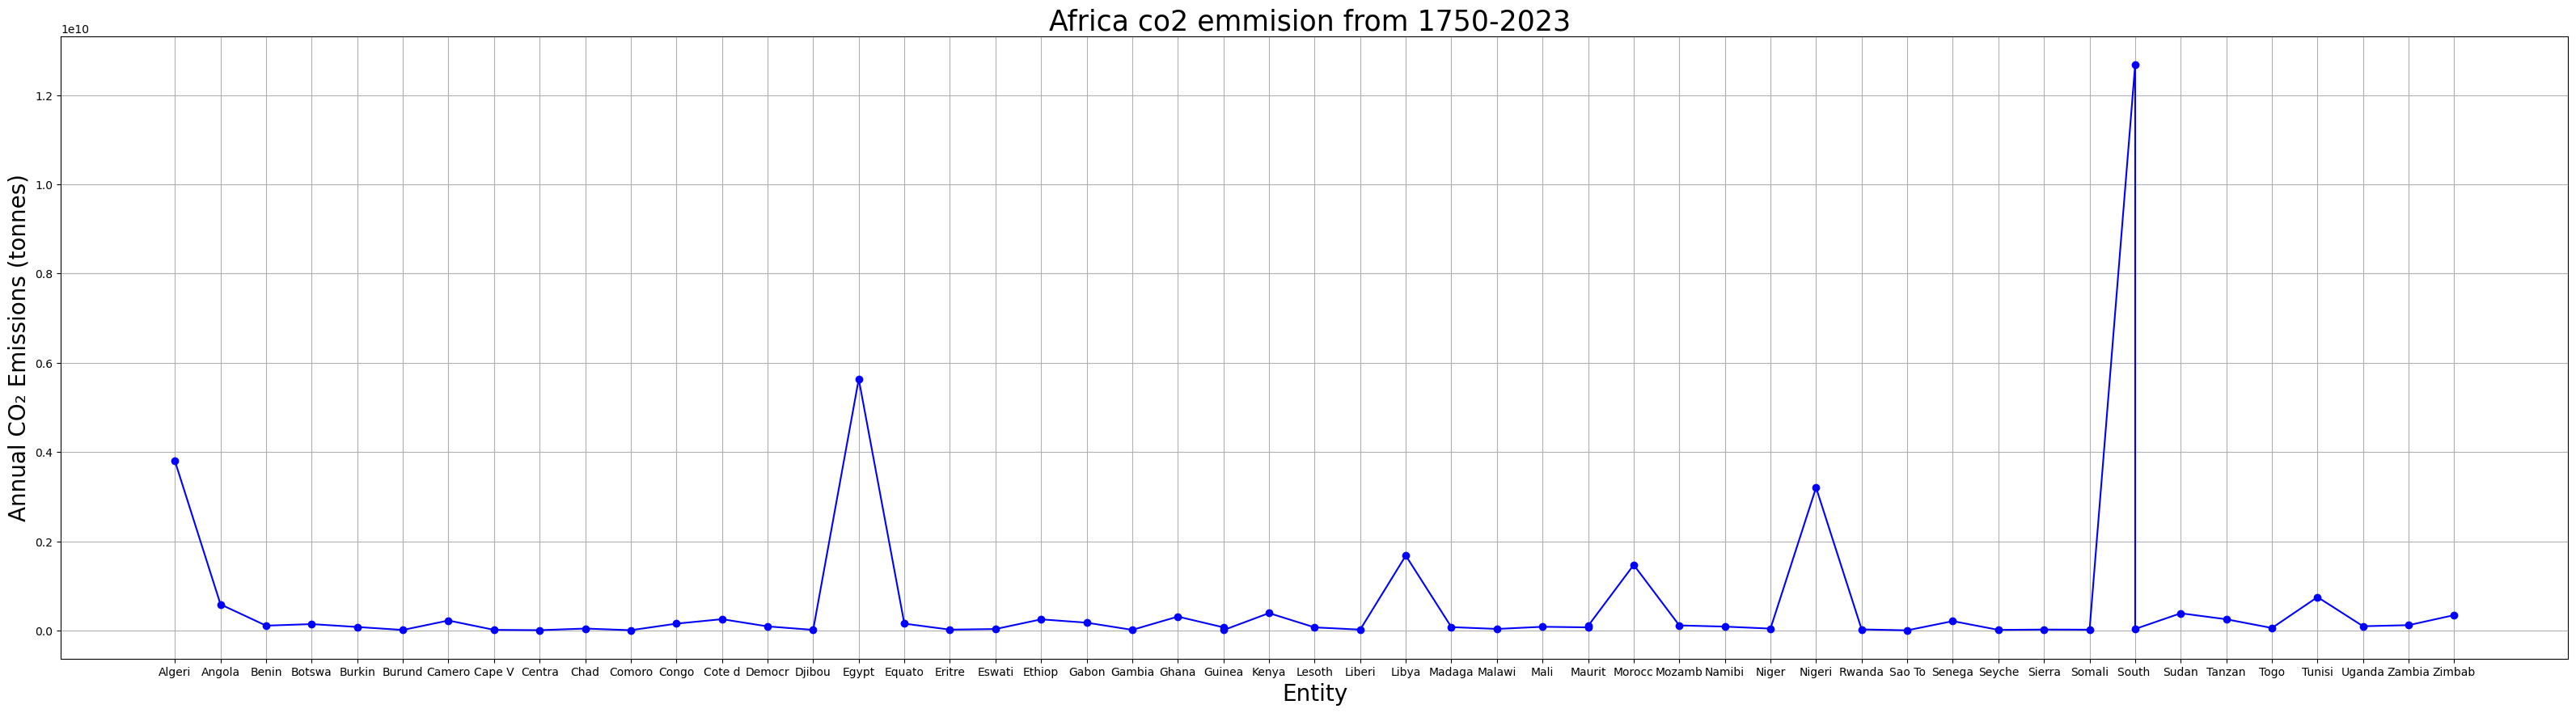

In [29]:
y = filtered_df[filtered_df['Region'] == 'Africa'].groupby('Entity')['Annual CO₂ emissions(tonnes)'].sum().reset_index()
print(y)
# Extract x and y for plotting
#x = y['Code']  
x = y['Entity'].str.slice(0, 6)  
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the y-axis
#create figure
plt.figure(figsize=(40, 10))

# Create the plot
plt.plot(x, emissions, marker='o', color='blue')  # Adding markers for clarity
plt.xlabel('Entity',fontsize=20)
plt.ylabel('Annual CO₂ Emissions (tonnes)',fontsize=20)
plt.title('Africa co2 emmision from 1750-2023 ',fontsize=25)

plt.grid(True)
plt.show()

##### 2.Emmision of CO2 in the classified Regions over the past three decades
- The global column in this analysis represent just three entities("World", "International aviation", "International shipping"), and that is why the value is low. If we are add everything for the world at large then it will have the highest CO2 emiision in the last 3 decades.

In [30]:
filtered_df['Region'].unique()

array(['Asia', 'Continent', 'Regional Groupings', 'Europe', 'Africa',
       'Territories', 'Antarctica', 'North America', 'South America',
       'Oceania', 'Income Classifications', 'Global', 'Special Events'],
      dtype=object)

                    Region  Annual CO₂ emissions(tonnes)
0                   Africa                  3.460887e+10
1               Antarctica                  8.060800e+04
2                     Asia                  4.967582e+11
3                Continent                  9.062508e+11
4                   Europe                  1.305510e+11
5                   Global                  9.637369e+11
6   Income Classifications                  9.062390e+11
7            North America                  2.012666e+11
8                  Oceania                  1.258357e+10
9       Regional Groupings                  2.383959e+12
10           South America                  2.885650e+10
11          Special Events                  0.000000e+00
12             Territories                  1.626107e+09


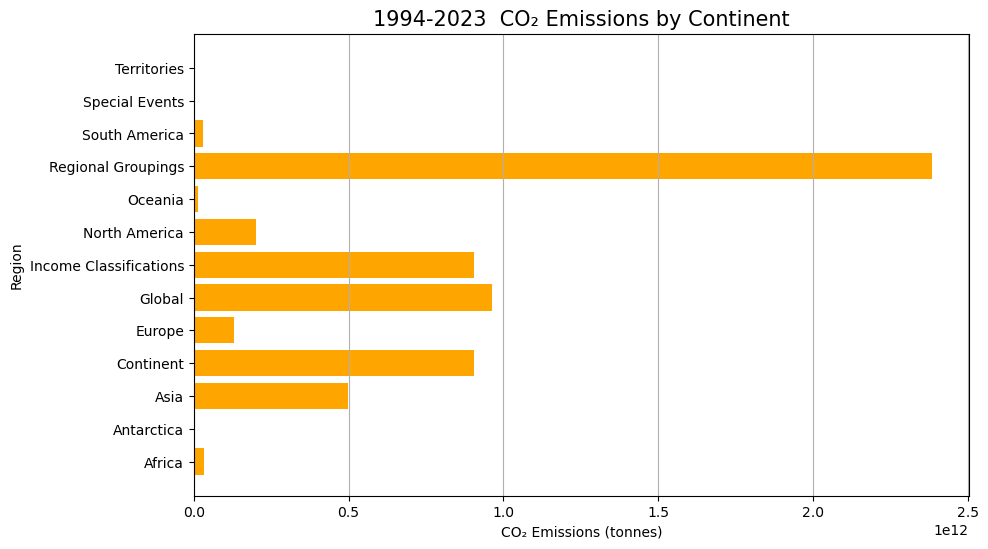

In [31]:
y = filtered_df[ filtered_df['Year'].isin(range(1994,2024) )&
    (filtered_df['Region'].isin(['Continent', 'Regional Groupings', 'Territories', 'Income Classifications', 'Global', 'Special Events'])) |
    (filtered_df['Region'].isin(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania', 'Antarctica']))
].groupby('Region')['Annual CO₂ emissions(tonnes)'].sum().reset_index()

print(y)

# Extract x and y for plotting
regions = y['Region']  # Regions for the y-axis
emissions = y['Annual CO₂ emissions(tonnes)']  # Emissions for the x-axis

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.barh(regions, emissions, color='orange')  # Horizontal bar chart
plt.xlabel('CO₂ Emissions (tonnes)', fontsize=10)  # x-axis label
plt.ylabel('Region', fontsize=10)  # y-axis label
plt.title('1994-2023  CO₂ Emissions by Continent', fontsize=15)  # Title

plt.grid(axis='x')  # Add grid lines for better readability
plt.show()

In [32]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7410 entries, 45 to 29136
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        7410 non-null   object 
 1   Code                          7410 non-null   object 
 2   Year                          7410 non-null   int64  
 3   Annual CO₂ emissions(tonnes)  7410 non-null   float64
 4   Region                        7410 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 347.3+ KB
